# Research Skills: Spatiotemporal Data Analyis
## Take-home Assignment
Sharon Ong, Department of Cognitive Science and Artificial Intelligence, 
Tilburg University
Academic Year 2021-2022

Your First Name: Kafia

Your Last Name: Elmi

Your Student ID: 

# References
- https://datagy.io/histogram-python/
- https://plotly.com/matlab/subplots/
- https://gis.stackexchange.com/questions/345171/how-to-create-density-scatter-plot-from-dataset-for-pairgrid-in-python
- https://www.statology.org/transform-data-in-python/

# Part 3
## Predicting the average income in the Netherlands with spatial autoregression
1. [5 points] Load the dataset. Create histogram plots of the latitude, longitude, average income, average house price and population density (the data in the columns LATITUDE,LONGITUDE, Population Density, Average House Price, Average Income). Is each feature normally distributed?

Points breakdown: 3 points for the histogram plot. 2 points for answering the question.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
gemeentedata=pd.read_csv('/Users/kafiaelmi/Downloads/Gemeenten_dataset.csv')
display(gemeentedata.head())


plt.subplot(3, 3, 1)
plt.title("LATITUDE")
gemeentedata.LATITUDE.hist()
plt.subplot(3, 3, 2)
plt.title("LONGITUDE")
gemeentedata.LONGITUDE.hist()
plt.subplot(3, 3, 3)
plt.title("Population_Density")
gemeentedata.Population_Density.hist()
plt.subplot(3, 3, 4)
plt.title("Average_House_Price")
gemeentedata.Average_House_Price.hist()
plt.subplot(3, 3, 5)
plt.title("Average_Income")
gemeentedata.Average_Income.hist()

# Average house price, average income and population density is not normally distributed

,GM_CODE,GM_NAAM,ELEVATION,LATITUDE,LONGITUDE,Average_House_Price,Average_Income,Population_Density
0,GM0003,Appingedam,0.48,53.32,6.85,194.8,21.6,493
1,GM0010,Delfzijl,2.03,53.33,6.92,155.1,22.0,186
2,GM0014,Groningen,14.02,53.22,6.55,258.9,23.3,1257
3,GM0024,Loppersum,2.00,53.33,6.75,192.4,22.6,192
4,GM0034,Almere,1.92,52.37,5.22,294.3,24.7,1662


2. [5 points] Display the latitude and longitude in a dot density map with a dot size corresponding to average income (the data in the column Average Income).

Points breakdown: 3 points for a dot density map. For full points, the dot size shoud correspoind to the average income. 

(<matplotlib.collections.PathCollection at 0x12f558d90>,
 Text(0.5, 1.0, 'dot density map'))

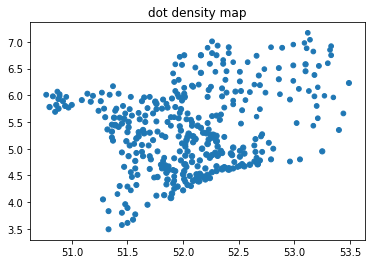

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
from matplotlib.colors import Normalize
from scipy.stats import gaussian_kde


def density_scatter_plot(x, y, s):
    """
    :param x: data positions on the x axis
    :param y: data positions on the y axis
    :return: matplotlib.collections.PathCollection object
    """
    # Kernel Density Estimate (KDE)
    values = np.vstack((x, y))
    kernel = gaussian_kde(values)
    kde = kernel.evaluate(values)
    
    s = s
    return plt.scatter(x, y, s), plt.title("dot density map")

density_scatter_plot(gemeentedata.LATITUDE, gemeentedata.LONGITUDE, s= gemeentedata.Average_Income) 

3. [10 points] Using distance based weighting schemes and KNN based weighing schemes, compute and compare the global autocorrelation (Global Moran's I) of Average Income and the log transformation of the Average Income. Try at least two distance values and 2 different K number of neighbours. Which feature (Average Income or its log transformation) has a higher autocorrelation?

Points breakdown: For each feature, 1 points for computing the global autocorrelation and 1.5 points for trying different distance values or settings (setting binary to True or False), 1.5 points for trying different number of neighbours. 2 points for answering the question.

In [49]:
import pandas as pd 
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import libpysal as ps 
from pysal.lib import weights


w_pool = weights.KNN.from_dataframe(gemeentedata, k=8)
# Assign spatial lag based on the pool values
lagged = gemeentedata.assign(w_pool=weights.spatial_lag.lag_spatial(w_pool, gemeentedata['Average_House_Price'].values))
lagged.head()


# compute the Global Morans,  
I_leave = es.moran.Moran(gemeentedata['Average_Income'].values - np.amin(gemeentedata['Average_Income'].values), qW)
print(I_leave.I, I_leave.p_sim)

/opt/anaconda3/lib/python3.7/site-packages/pysal/lib/weights/util.py:1026: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  data = np.vstack([np.array(shape.centroid) for shape in iterable])


NameError: name 'qW' is not defined

4. [10 points] Compute the local autocorrelation for the same two features. Choose the weighting scheme and parameters which gave you the highest correlation in 3.3. Identify the 'hotspots' by display the hotspots as these townships with different colors in a scatter plot.

Points breakdown: 2 points for computing local autocorrelation and 3 points for displaying the hotspots for Average Income. 2 points for computing local autocorrelation and 3 points for displaying the hotspots for the log transformation of Average Income.

ValueError: x must be a label or position

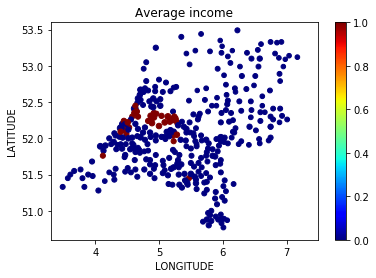

In [50]:
import pandas as pd 
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import libpysal as ps 
from pysal.lib import weights
import esda as es


# For Average Income

# KNN 3 gave us the highest correlation
w = ps.weights.distance.KNN.from_dataframe(gemeentedata, k=3)
# Row-standardization
w.transform = 'R'
# compute a local measure of spatial autocorrelation
I_district_income3 = es.moran.Moran_Local(gemeentedata['Average_Income'].values, w)
print(I_district_income3)
sig = I_district_income3 .p_sim < 0.05
hotspot = sig * I_district_income3 .q==1
plt.figure()
# Display the districts which are 'hotspots' in a scatter plot
# change color to hotspots to achieve this
plt.scatter(gemeentedata.LONGITUDE, gemeentedata.LATITUDE, c=hotspot, s=gemeentedata['Average_Income'], cmap='jet')
plt.colorbar()
plt.xlim(3.3, 7.5)
plt.ylim(50.6, 53.6)
plt.xlabel('LONGITUDE')
plt.ylabel('LATITUDE')
th=plt.title('Average income')

# add longitude and langitude
w = ps.weights.distance.KNN.from_dataframe(gemeentedata, k=3)
# Row-standardization
w.transform = 'R'
# compute a local measure of spatial autocorrelation
I_district_income3 = es.moran.Moran_Local(gemeentedata['Average_Income'].values, w)

sig = I_district_income3 .p_sim < 0.05
hotspot = sig * I_district_income3 .q==1

# Display the districts which are 'hotspots' on a map.
gemeentedata.plot(hotspot, figsize=(6,12), cmap = 'jet')

# For Average Income log transformation

# KNN 3 gave us the highest correlation
w = ps.weights.distance.KNN.from_dataframe(gemeentedata, k=3)
# Row-standardization
w.transform = 'R'
# Compute a local measure of spatial autocorrelation
I_district_logincome3 = es.moran.Moran_Local(gemeentedata['income_log'].values, w)

# Compute the hotspots
sig = I_district_logincome3 .p_sim < 0.05
hotspot = sig * I_district_logincome3 .q==1
plt.figure()
# Display the districts which are 'hotspots' in a scatter plot
# change color to hotspots to achieve this
plt.scatter(lst.LONGITUDE, lst.LATITUDE, c=hotspot, s=7*gemeentedata['income_log'], cmap='jet')
plt.colorbar()
plt.xlim(3.3, 7.5)
plt.ylim(50.6, 53.6)
plt.xlabel('LONGITUDE')
plt.ylabel('LATITUDE')
th=plt.title('Average income')

# For Average Income log transformation

# KNN 3 gave us the highest correlation
w = ps.weights.distance.KNN.from_dataframe(gemeentedata, k=3)
# Row-standardization
w.transform = 'R'
# Compute a local measure of spatial autocorrelation
I_district_logincome3 = es.moran.Moran_Local(gemeentedata['income_log'].values, w)

# Compute the hotspots
sig = I_district_logincome3 .p_sim < 0.05
hotspot = sig * I_district_logincome3 .q==1
plt.figure()
# Display the districts which are 'hotspots' in a scatter plot
# change color to hotspots to achieve this
plt.scatter(gemeentedata.LONGITUDE, gemeentedata.LATITUDE, c=hotspot, s=7*gemeentedata['income_log'], cmap='jet')
plt.colorbar()
plt.xlim(3.3, 7.5)
plt.ylim(50.6, 53.6)
plt.xlabel('LONGITUDE')
plt.ylabel('LATITUDE')
th=plt.title('Average income')

w = ps.weights.distance.KNN.from_dataframe(gemeentedata, k=3)
# Row-standardization
w.transform = 'R'
# compute a local measure of spatial autocorrelation
I_district_logincome1 = es.moran.Moran_Local(gemeentedata['income_log'].values, w)

# Compute the hotspots
sig = I_district_logincome1 .p_sim < 0.05
hotspot = sig * I_district_logincome1 .q==1

# Display the districts which are 'hotspots' on the map.
gemeentedata.plot(hotspot, figsize=(6,12), cmap = 'jet')

5. [15 points] Your goal is to compare predictions of average income per township based on the explanatory variables (the average house price and population density) as well as the spatially lagged average house price (exogenous regressor) and the spatially lagged average income (endogenous regressor). Please use the spreg" package for this task. Perform the following for a maximum of 20 points.

(a) Fit a baseline linear regression model, where your target variable is the average income (the column Average Income) and your features (exploratory variables) are the columns Population Density and Average House Price. [3 points]

(b) One of the spatially lag variables that we think may affect the average income is the average house price. Using a weighting scheme of your choice, assigned (create) a spatial lag based on the average house price. Run the model, which has the same setup as in (a), with the exception that it includes this spatial lag. [3 points]

(c) Using "GM Lag", run a spatial autoregression model with the lag of Average Income and the features in (a).[3 points]

(d) Using "GM Lag", run a spatial autoregression model with the lag of Average Income with the Population Density, Average House Price and the spatial lag of the Average House Price. (The features used in (b)). [3 points]

(e) Compute the mean square error for the regressors in (a), (b), (c) and (d). Which regressor model resulted in the lowest mean square error? [3 points]

In [41]:
# a.
gemeentedata ['income_log'] = gemeentedata['Average_Income']
print(gemeentedata.head())
gemeentedata.dropna(axis = 0, how= 'any', inplace = True)

w = ps.weights.KNN.from_array(gemeentedata.loc[gemeentedata.index, ['LONGITUDE', 'LATITUDE']].values,10)
w.transform = 'r'
Wmatrix, ids = w.full()

y = gemeentedata['Average_Income']
# Fit OLS model
variable_names = ['Population_Density','Average_House_Price']
m1 = sp.OLS(
    # Dependent variable
    y.values[:, None],
    # Independent variables
    gemeentedata[variable_names].values,
    # Dependent variable name
    name_y='Average_income',
    # Independent variable name
    name_x=variable_names
)
print(m1.summary)

# b.
w_Average_House_Price = ps.weights.KNN.from_array(gemeentedata.loc[gemeentedata.index,['LONGITUDE', 'LATITUDE']].values,8)
w_Average_House_Price.transform = 'r'
gemeentedata_w = gemeentedata.assign(w_Average_House_Price=ps.weights.lag_spatial(w_Average_House_Price, gemeentedata['Average_House_Price'].values))
display(gemeentedata_w)

variable_names_2 = variable_names + ["w_Average_House_Price"]

m2 = sp.OLS(
    # Dependent variable
    y.values[:, None],
    # Independent variables
    gemeentedata_w[variable_names_2].values,
    # Dependent variable name
    name_y='Average_Income',
    # Independent variable name
    name_x=variable_names_2
)
print(m2.summary)

# c.
w_income = ps.weights.KNN.from_array(gemeentedata.loc[gemeentedata.index,['LONGITUDE', 'LATITUDE']].values,10)
w_income.transform = 'r'
m3 = sp.GM_Lag(y.values[:, None],
               gemeentedata[variable_names].values,
               w=w_income,
               name_y='Average_Income',
               name_x=variable_names)
print(m3.summary)

#d.
w_income = ps.weights.KNN.from_array(gemeentedata_w.loc[gemeentedata_w.index,['LONGITUDE', 'LATITUDE']].values,10)
w_income.transform = 'r'
m4 = sp.GM_Lag(y.values[:, None],
               gemeentedata_w[variable_names_2].values,
               w=w_income,
               name_y='Average_Income',
               name_x=variable_names_2)
print(m4.summary)

#e.
from sklearn.metrics import mean_squared_error as mse

mses = pd.Series({'OLS': mse(y.values[:, None], m1.predy.flatten()), \
                  'OLS+w_Average_House_Price': mse(y.values[:, None], m2.predy.flatten()), \
                  'Lag_c': mse(y.values[:, None], m3.predy_e), \
                  'Lag_d': mse(y.values[:, None], m4.predy_e)})
print(mses.sort_values())
print("Lowest Mean Square Error : " , mses.sort_values().min())
# OLS+w_Average_House_Price, so subquestion b., has the lowest mse.

6

# perform a log transformation features
Average_Income_log = np.log(gemeentedata['Average_Income'])
Population_Density_log = np.log(gemeentedata['Population_Density'])
Average_House_Price_log = np.log(gemeentedata['Average_House_Price'])
log_df = gemeentedata[['LATITUDE','LONGITUDE', 'Population_Density','Average_House_Price','Average_Income']]

log_df['Average_Income_log'] = Average_Income_log
log_df['Population_Density_log'] = Population_Density_log
log_df['Average_House_Price_log'] = Average_House_Price_log
log_df.head()

# OLS model
log_df.dropna(axis = 0, how= 'any', inplace = True)

w = ps.weights.KNN.from_array(log_df.loc[log_df.index, ['LONGITUDE', 'LATITUDE']].values,10)
w.transform = 'r'
Wmatrix, ids = w.full()

y = log_df['Average_Income_log']
# Fit OLS model
variable_names = ['Population_Density_log','Average_House_Price_log']
m1_log = sp.OLS(
    # Dependent variable
    y.values[:, None],
    # Independent variables
    log_df[variable_names].values,
    # Dependent variable name
    name_y='Average_income_log',
    # Independent variable name
    name_x=variable_names
)
print(m1_log.summary)

# OLS + w_Average_House_Price_log model
w_Average_House_Price_log = ps.weights.KNN.from_array(log_df.loc[log_df.index,['LONGITUDE', 'LATITUDE']].values,8)
w_Average_House_Price_log.transform = 'r'
log_df_w = log_df.assign(w_Average_House_Price_log=ps.weights.lag_spatial(w_Average_House_Price_log, log_df['Average_House_Price_log'].values))
display(log_df_w)

variable_names_2 = variable_names + ["w_Average_House_Price_log"]

m2_log = sp.OLS(
    # Dependent variable
    y.values[:, None],
    # Independent variables
    log_df_w[variable_names_2].values,
    # Dependent variable name
    name_y='Average_Income_log',
    # Independent variable name
    name_x=variable_names_2
)
print(m2_log.summary)

# Lag c
w_income_log = ps.weights.KNN.from_array(log_df.loc[log_df.index,['LONGITUDE', 'LATITUDE']].values,10)
w_income_log.transform = 'r'
m3_log = sp.GM_Lag(y.values[:, None],
               log_df[variable_names].values,
               w=w_income_log,
               name_y='Average_Income_log',
               name_x=variable_names)
print(m3_log.summary)

# Lag d
w_income_log = ps.weights.KNN.from_array(log_df_w.loc[log_df_w.index,['LONGITUDE', 'LATITUDE']].values,10)
w_income_log.transform = 'r'
m4_log = sp.GM_Lag(y.values[:, None],
               log_df_w[variable_names_2].values,
               w=w_income_log,
               name_y='Average_Income_log',
               name_x=variable_names_2)
print(m4_log.summary)

from sklearn.metrics import mean_squared_error as mse

mses = pd.Series({'OLS': mse(y.values[:, None], m1_log.predy.flatten()), \
                  'OLS+w_Average_House_Price': mse(y.values[:, None], m2_log.predy.flatten()), \
                  'Lag_c': mse(y.values[:, None], m3_log.predy_e), \
                  'Lag_d': mse(y.values[:, None], m4_log.predy_e)})
mses = np.exp(mses)
print(mses.sort_values())
print("Lowest Mean Square Error : " , mses.sort_values().min())
# OLS+w_Average_House_Price again has the lowest mse.

  GM_CODE     GM_NAAM  ELEVATION  LATITUDE  LONGITUDE  Average_House_Price  \
0  GM0003  Appingedam       0.48     53.32       6.85                194.8   
1  GM0010    Delfzijl       2.03     53.33       6.92                155.1   
2  GM0014   Groningen      14.02     53.22       6.55                258.9   
3  GM0024   Loppersum       2.00     53.33       6.75                192.4   
4  GM0034      Almere       1.92     52.37       5.22                294.3   

   Average_Income  Population_Density                  geometry  w_Pct_Leave  \
0            21.6                 493  POINT (53.32000 6.85000)     53.21125   
1            22.0                 186  POINT (53.33000 6.92000)     53.19750   
2            23.3                1257  POINT (53.22000 6.55000)     53.18625   
3            22.6                 192  POINT (53.33000 6.75000)     53.20500   
4            24.7                1662  POINT (52.37000 5.22000)     52.26625   

   Pct_Leave_std  w_Pct_Leave_std  income_log  w_A

,GM_CODE,GM_NAAM,ELEVATION,LATITUDE,LONGITUDE,Average_House_Price,Average_Income,Population_Density,geometry,w_Pct_Leave,Pct_Leave_std,w_Pct_Leave_std,income_log,w_Average_House_Price
0,GM0003,Appingedam,0.48,53.32,6.85,194.8,21.6,493,POINT (53.32000 6.85000),53.21125,1.249239,1.140489,21.6,190.8125
1,GM0010,Delfzijl,2.03,53.33,6.92,155.1,22.0,186,POINT (53.33000 6.92000),53.19750,1.259239,1.126739,22.0,189.6875
2,GM0014,Groningen,14.02,53.22,6.55,258.9,23.3,1257,POINT (53.22000 6.55000),53.18625,1.149239,1.115489,23.3,231.8500
3,GM0024,Loppersum,2.00,53.33,6.75,192.4,22.6,192,POINT (53.33000 6.75000),53.20500,1.259239,1.134239,22.6,207.8625
4,GM0034,Almere,1.92,52.37,5.22,294.3,24.7,1662,POINT (52.37000 5.22000),52.26625,0.299239,0.195489,24.7,513.5250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,GM1963,Hoeksche Waard,-3.00,51.77,4.47,297.3,28.0,327,POINT (51.77000 4.47000),51.85250,-0.300761,-0.218261,28.0,280.8000
351,GM1966,Het Hogeland,0.00,53.30,6.60,188.8,22.1,99,POINT (53.30000 6.60000),53.17625,1.229239,1.105489,22.1,240.6125
352,GM1969,Westerkwartier,2.00,53.18,6.38,240.8,23.2,176,POINT (53.18000 6.38000),53.11875,1.109239,1.047989,23.2,248.5750
353,GM1970,Noardeast-Fryslan,-2.00,53.35,5.96,194.8,20.4,120,POINT (53.35000 5.96000),53.24500,1.279239,1.174239,20.4,257.8250


REGRESSION
----------
SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :        None
Dependent Variable  :Average_Income                Number of Observations:         355
Mean dependent var  :     25.8949                Number of Variables   :           4
S.D. dependent var  :      3.5815                Degrees of Freedom    :         351
R-squared           :      0.8171
Adjusted R-squared  :      0.8155
Sum squared residual:     830.494                F-statistic           :    522.7122
Sigma-square        :       2.366                Prob(F-statistic)     :  4.449e-129
S.E. of regression  :       1.538                Log likelihood        :    -654.581
Sigma-square ML     :       2.339                Akaike info criterion :    1317.162
S.E of regression ML:      1.5295                Schwarz criterion     :    1332.650

---------------------------------------------------------------------------

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:84: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

,LATITUDE,LONGITUDE,Population_Density,Average_House_Price,Average_Income,Average_Income_log,Population_Density_log,Average_House_Price_log,w_Average_House_Price_log
0,53.32,6.85,493,194.8,21.6,3.072693,6.200509,5.271973,5.239805
1,53.33,6.92,186,155.1,22.0,3.091042,5.225747,5.044070,5.242245
2,53.22,6.55,1257,258.9,23.3,3.148453,7.136483,5.556442,5.429413
3,53.33,6.75,192,192.4,22.6,3.117950,5.257495,5.259577,5.312177
4,52.37,5.22,1662,294.3,24.7,3.206803,7.415777,5.684600,6.202463
...,...,...,...,...,...,...,...,...,...
350,51.77,4.47,327,297.3,28.0,3.332205,5.789960,5.694742,5.623561
351,53.30,6.60,99,188.8,22.1,3.095578,4.595120,5.240688,5.468882
352,53.18,6.38,176,240.8,23.2,3.144152,5.170484,5.483967,5.504566
353,53.35,5.96,120,194.8,20.4,3.015535,4.787492,5.271973,5.537131


REGRESSION
----------
SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :        None
Dependent Variable  :Average_Income_log                Number of Observations:         355
Mean dependent var  :      3.2459                Number of Variables   :           4
S.D. dependent var  :      0.1241                Degrees of Freedom    :         351
R-squared           :      0.7590
Adjusted R-squared  :      0.7570
Sum squared residual:       1.313                F-statistic           :    368.5722
Sigma-square        :       0.004                Prob(F-statistic)     :  4.417e-108
S.E. of regression  :       0.061                Log likelihood        :     490.198
Sigma-square ML     :       0.004                Akaike info criterion :    -972.395
S.E of regression ML:      0.0608                Schwarz criterion     :    -956.907

-----------------------------------------------------------------------

6. [10 points] Perform a log transformation of the Population Density, Average House Price and Average Income. Run the four regressor models in Question 3.5 with the log transformation of the data. Compute the mean square error for each model. List the regressor model resulted in the lowest mean square error. Does performing a log transformation on your target variable and features reduce your mean square error?

Points breakdown: 2 points performing a log transformation. 2 points each for running each of the 4 models and 2 points answering the question.

In [42]:
import numpy as np
import matplotlib.pyplot as plt

#make this example reproducible
np.random.seed(0)

#create log-transformed data
data_logp = np.log(gemeentedata.Population_Density)
data_logah = np.log(gemeentedata.Average_House_Price)
data_logai = np.log(gemeentedata.Average_Income)

6

# perform a log transformation features
Average_Income_log = np.log(gemeentedata['Average_Income'])
Population_Density_log = np.log(gemeentedata['Population_Density'])
Average_House_Price_log = np.log(gemeentedata['Average_House_Price'])
log_df = gemeentedata[['LATITUDE','LONGITUDE', 'Population_Density','Average_House_Price','Average_Income']]

log_df['Average_Income_log'] = Average_Income_log
log_df['Population_Density_log'] = Population_Density_log
log_df['Average_House_Price_log'] = Average_House_Price_log
log_df.head()

# OLS model
log_df.dropna(axis = 0, how= 'any', inplace = True)

w = ps.weights.KNN.from_array(log_df.loc[log_df.index, ['LONGITUDE', 'LATITUDE']].values,10)
w.transform = 'r'
Wmatrix, ids = w.full()

y = log_df['Average_Income_log']
# Fit OLS model
variable_names = ['Population_Density_log','Average_House_Price_log']
m1_log = sp.OLS(
    # Dependent variable
    y.values[:, None],
    # Independent variables
    log_df[variable_names].values,
    # Dependent variable name
    name_y='Average_income_log',
    # Independent variable name
    name_x=variable_names
)
print(m1_log.summary)

# OLS + w_Average_House_Price_log model
w_Average_House_Price_log = ps.weights.KNN.from_array(log_df.loc[log_df.index,['LONGITUDE', 'LATITUDE']].values,8)
w_Average_House_Price_log.transform = 'r'
log_df_w = log_df.assign(w_Average_House_Price_log=ps.weights.lag_spatial(w_Average_House_Price_log, log_df['Average_House_Price_log'].values))
display(log_df_w)

variable_names_2 = variable_names + ["w_Average_House_Price_log"]

m2_log = sp.OLS(
    # Dependent variable
    y.values[:, None],
    # Independent variables
    log_df_w[variable_names_2].values,
    # Dependent variable name
    name_y='Average_Income_log',
    # Independent variable name
    name_x=variable_names_2
)
print(m2_log.summary)

# Lag c
w_income_log = ps.weights.KNN.from_array(log_df.loc[log_df.index,['LONGITUDE', 'LATITUDE']].values,10)
w_income_log.transform = 'r'
m3_log = sp.GM_Lag(y.values[:, None],
               log_df[variable_names].values,
               w=w_income_log,
               name_y='Average_Income_log',
               name_x=variable_names)
print(m3_log.summary)

# Lag d
w_income_log = ps.weights.KNN.from_array(log_df_w.loc[log_df_w.index,['LONGITUDE', 'LATITUDE']].values,10)
w_income_log.transform = 'r'
m4_log = sp.GM_Lag(y.values[:, None],
               log_df_w[variable_names_2].values,
               w=w_income_log,
               name_y='Average_Income_log',
               name_x=variable_names_2)
print(m4_log.summary)

from sklearn.metrics import mean_squared_error as mse

mses = pd.Series({'OLS': mse(y.values[:, None], m1_log.predy.flatten()), \
                  'OLS+w_Average_House_Price': mse(y.values[:, None], m2_log.predy.flatten()), \
                  'Lag_c': mse(y.values[:, None], m3_log.predy_e), \
                  'Lag_d': mse(y.values[:, None], m4_log.predy_e)})
mses = np.exp(mses)
print(mses.sort_values())
print("Lowest Mean Square Error : " , mses.sort_values().min())
# OLS+w_Average_House_Price again has the lowest mse.


REGRESSION
----------
SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :        None
Dependent Variable  :Average_income_log                Number of Observations:         355
Mean dependent var  :      3.2459                Number of Variables   :           3
S.D. dependent var  :      0.1241                Degrees of Freedom    :         352
R-squared           :      0.7499
Adjusted R-squared  :      0.7485
Sum squared residual:       1.363                F-statistic           :    527.7542
Sigma-square        :       0.004                Prob(F-statistic)     :  1.159e-106
S.E. of regression  :       0.062                Log likelihood        :     483.593
Sigma-square ML     :       0.004                Akaike info criterion :    -961.186
S.E of regression ML:      0.0620                Schwarz criterion     :    -949.570

-----------------------------------------------------------------------

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

,LATITUDE,LONGITUDE,Population_Density,Average_House_Price,Average_Income,Average_Income_log,Population_Density_log,Average_House_Price_log,w_Average_House_Price_log
0,53.32,6.85,493,194.8,21.6,3.072693,6.200509,5.271973,5.239805
1,53.33,6.92,186,155.1,22.0,3.091042,5.225747,5.044070,5.242245
2,53.22,6.55,1257,258.9,23.3,3.148453,7.136483,5.556442,5.429413
3,53.33,6.75,192,192.4,22.6,3.117950,5.257495,5.259577,5.312177
4,52.37,5.22,1662,294.3,24.7,3.206803,7.415777,5.684600,6.202463
...,...,...,...,...,...,...,...,...,...
350,51.77,4.47,327,297.3,28.0,3.332205,5.789960,5.694742,5.623561
351,53.30,6.60,99,188.8,22.1,3.095578,4.595120,5.240688,5.468882
352,53.18,6.38,176,240.8,23.2,3.144152,5.170484,5.483967,5.504566
353,53.35,5.96,120,194.8,20.4,3.015535,4.787492,5.271973,5.537131


REGRESSION
----------
SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :        None
Dependent Variable  :Average_Income_log                Number of Observations:         355
Mean dependent var  :      3.2459                Number of Variables   :           4
S.D. dependent var  :      0.1241                Degrees of Freedom    :         351
R-squared           :      0.7590
Adjusted R-squared  :      0.7570
Sum squared residual:       1.313                F-statistic           :    368.5722
Sigma-square        :       0.004                Prob(F-statistic)     :  4.417e-108
S.E. of regression  :       0.061                Log likelihood        :     490.198
Sigma-square ML     :       0.004                Akaike info criterion :    -972.395
S.E of regression ML:      0.0608                Schwarz criterion     :    -956.907

-----------------------------------------------------------------------